In [79]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from config import geoapify_key

# Import plot namespaces
import matplotlib.pyplot as plt
import seaborn as sns



In [80]:
# Import Alzheimer data file as DataFrame
alzheimer_pd = pd.read_csv("Resources/alzheimers_prediction_dataset.csv")
alzheimer_pd.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [ ]:
# Filter out the cases with "Alzheimer’s Diagnosis" == "No"
df_filtered = alzheimer_pd[alzheimer_pd["Alzheimer’s Diagnosis"] == "Yes"]

# Get count of Alzheimer test incidents, per country
grouped_summary_df = df_filtered.groupby("Country").size().reset_index(name="Incident Count")
grouped_summary_df


,Country,Incident Count
0,Argentina,1500
1,Australia,1525
2,Brazil,1865
3,Canada,1267
4,China,1388
5,France,1486
6,Germany,1564
7,India,1883
8,Italy,1465
9,Japan,1273


In [92]:
# Get the toal number of countries in research dataset
number_of_countries = len(grouped_summary_df)
number_of_countries

20

In [93]:
# Sort grouped dataframe by number of incidents
grouped_summary_df = grouped_summary_df.sort_values(by="Incident Count", ascending=True)
grouped_summary_df

,Country,Incident Count
17,Sweden,1262
3,Canada,1267
9,Japan,1273
11,Norway,1296
4,China,1388
19,USA,1405
8,Italy,1465
18,UK,1474
16,Spain,1479
5,France,1486


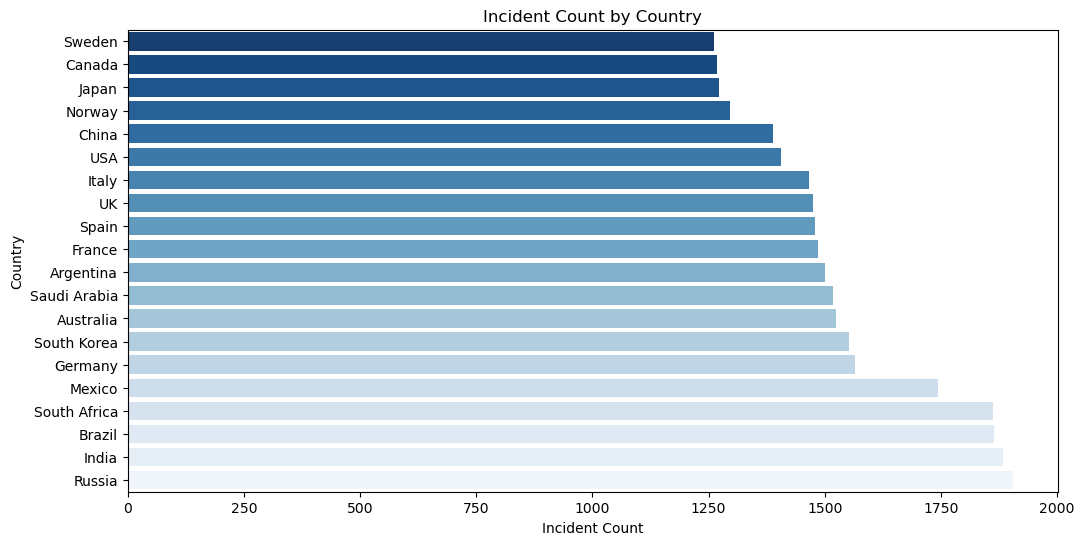

In [94]:
# Plot the bar chart
plt.figure(figsize=(12, 6))

sns.barplot(x="Incident Count", y="Country", data=grouped_summary_df, palette="Blues_r")
# sns.barplot(x="Country", y="Incident Count", data=grouped_summary_df, palette="Blues_r")

# Add labels and title

plt.xlabel("Incident Count")
plt.ylabel("Country")
plt.title("Incident Count by Country")

# plt.xlabel("Country")
# plt.ylabel("Incident Count")
# plt.title("Incident Count by Country")

# Show the plot
plt.show()

In [96]:
grouped_by_gender_df = df_filtered.groupby(["Country", "Gender"]).size().reset_index(name="Incident Count")
grouped_by_gender_df

,Country,Gender,Incident Count
0,Argentina,Female,739
1,Argentina,Male,761
2,Australia,Female,755
3,Australia,Male,770
4,Brazil,Female,931
5,Brazil,Male,934
6,Canada,Female,635
7,Canada,Male,632
8,China,Female,695
9,China,Male,693


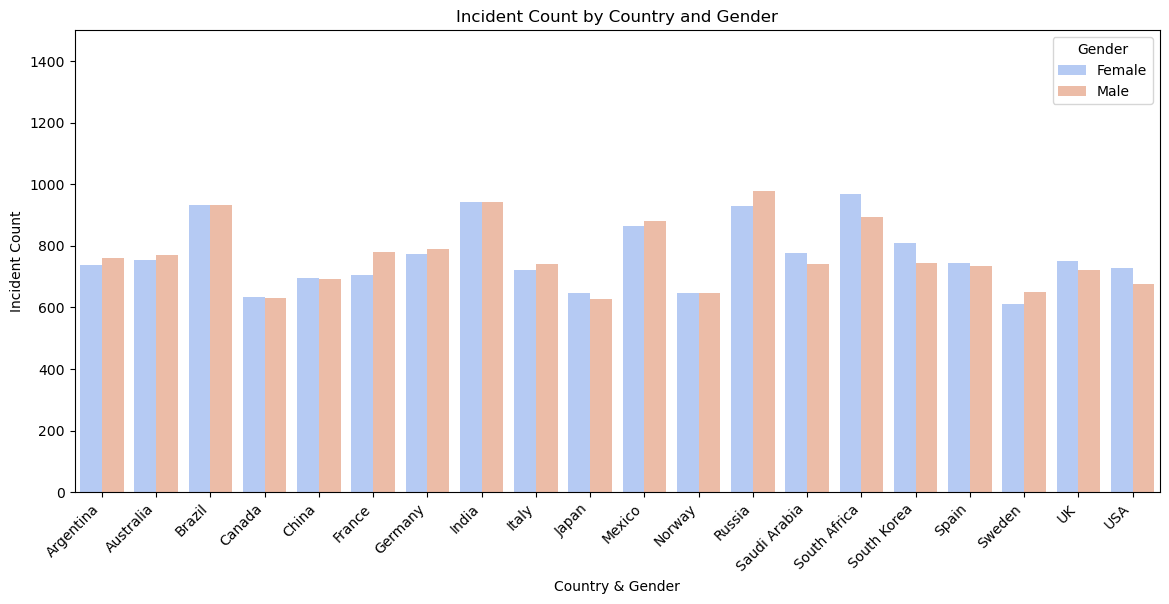

In [98]:
# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x="Country", y="Incident Count", hue="Gender", data=grouped_by_gender_df, palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set Y-axis limit to 2500 incident counts
plt.ylim(0, 1500)

# Add labels and title
plt.xlabel("Country & Gender")
plt.ylabel("Incident Count")
plt.title("Incident Count by Country and Gender")
plt.legend(title="Gender")

# Show the plot
plt.show()

In [99]:
# Calculate average incidents count for men
avg_incident_count_male = grouped_by_gender_df[grouped_by_gender_df["Gender"] == "Male"]["Incident Count"].mean()
avg_incident_count_male

766.85

In [100]:
# Calculate average incidents count for women
avg_incident_count_female = grouped_by_gender_df[grouped_by_gender_df["Gender"] == "Female"]["Incident Count"].mean()
avg_incident_count_female

768.8

In [101]:
# Calculate average incidents count for countries
avg_incident_count = grouped_summary_df["Incident Count"].mean()
avg_incident_count


1535.65